# Data Loading and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score




In [ ]:
# Load the data
df = pd.read_csv('/content/Assignment - Junior Data Analyst.csv')

In [ ]:
# 1. Extract numeric part of the 'battery' column and drop the original column
df['battery capacity in mAH'] = df['battery'].str.extract(r'(\d+)').astype(float)
df.drop(['battery'], axis=1, inplace=True)

# 2. Process the 'camera' column to extract the number of cameras, highest back camera, and front camera
def process_camera_info(camera_str):
    if '|' in camera_str:
        back_part, front_part = camera_str.split('|')
        back_cameras = re.findall(r'(\d+)MP', back_part)
        num_back_cameras = len(back_cameras)
        highest_back_camera = max([int(cam) for cam in back_cameras]) if back_cameras else 0
        front_camera = int(re.search(r'(\d+)MP', front_part).group(1))
    else:
        back_cameras = re.findall(r'(\d+)MP', camera_str)
        num_back_cameras = len(back_cameras)
        highest_back_camera = max([int(cam) for cam in back_cameras]) if back_cameras else 0
        front_camera = None
    return pd.Series([num_back_cameras, highest_back_camera, front_camera])

df[['Number of cameras', 'Back camera (Highest)', 'Front camera']] = df['camera'].apply(process_camera_info)
df.drop(['camera'], axis=1, inplace=True)

# 3. Extract the screen size and display type from the 'display' column
df['Screen Size (inches)'] = df['display'].str.extract(r'\(([\d.]+) inch\)').astype(float)
df['Display Type'] = df['display'].str.extract(r'inch\)\s*(.*) Display')
df['Display Type'] = df['Display Type'].fillna('Unknown')
df.drop(['display'], axis=1, inplace=True)

# 4. Split the 'memory' column into 'mobile RAM GB', 'mobile ROM GB', and 'expandable storage GB' as floats
df['mobile RAM GB'] = df['memory'].str.extract(r'(\d+)\s*GB\s*RAM').astype(float)
df['mobile ROM GB'] = df['memory'].str.extract(r'(\d+)\s*GB\s*ROM').astype(float)
df['expandable storage GB'] = df['memory'].str.extract(r'Expandable Upto\s*(\d+)\s*GB').astype(float)
df.drop(['memory'], axis=1, inplace=True)

# 5. Clean up the 'reviews' column by removing commas and converting to integer
df['reviews'] = df['reviews'].str.replace(',', '').str.extract(r'(\d+)').astype(float)


# Display the resulting DataFrame
df.head()

,name,price,processor,rating,reviews,warranty,battery capacity in mAH,Number of cameras,Back camera (Highest),Front camera,Screen Size (inches),Display Type,mobile RAM GB,mobile ROM GB,expandable storage GB
0,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,55078.0,Brand Warranty of 1 Year Available for Mobile ...,5000.0,2.0,12.0,8.0,6.22,HD+,4.0,64.0,512.0
1,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,20062.0,Sunrise Design,5000.0,4.0,12.0,8.0,6.52,HD+,4.0,64.0,NaN
2,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,20062.0,Sunrise Design,5000.0,4.0,12.0,8.0,6.52,HD+,4.0,128.0,NaN
3,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,20062.0,Sunrise Design,5000.0,4.0,12.0,8.0,6.52,HD+,4.0,128.0,NaN
4,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,10091.0,Dual Nano SIM slots and Memory Card Slot,4000.0,2.0,13.0,5.0,6.10,HD+,3.0,32.0,256.0


We cleaned and processed the dataset by extracting relevant numeric information from combined columns and converting them into separate, usable columns. This included parsing battery capacity, camera specifications, screen size, and memory details, and handling missing values. These steps help standardize the data for better analysis and modeling by ensuring each feature is in a consistent format and removing irrelevant or redundant information.

# Explorartory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     984 non-null    object 
 1   price                    984 non-null    int64  
 2   processor                983 non-null    object 
 3   rating                   971 non-null    float64
 4   reviews                  971 non-null    float64
 5   warranty                 836 non-null    object 
 6   battery capacity in mAH  984 non-null    float64
 7   Number of cameras        984 non-null    float64
 8   Back camera (Highest)    984 non-null    float64
 9   Front camera             892 non-null    float64
 10  Screen Size (inches)     981 non-null    float64
 11  Display Type             984 non-null    object 
 12  mobile RAM GB            968 non-null    float64
 13  mobile ROM GB            979 non-null    float64
 14  expandable storage GB    6

The dataset contains 984 rows with multiple features related to SmartPhones, including `price`, `rating`, and `battery capacity`. Some columns missing values such as `processor`, `rating`, `reviews`, `warranty`, `Front camera`, and `expandable storage GB`.

In [ ]:
df.describe()

,price,rating,reviews,battery capacity in mAH,Number of cameras,Back camera (Highest),Front camera,Screen Size (inches),mobile RAM GB,mobile ROM GB,expandable storage GB
count,984.000000,971.000000,971.000000,984.000000,984.00000,984.000000,892.000000,981.000000,968.000000,979.000000,692.000000
mean,15429.848577,4.241195,6441.051493,3821.072154,2.12500,23.938008,14.149103,6.023378,4.334711,75.378958,274.034682
std,12891.355967,0.300296,14962.010067,908.890246,1.15336,20.010150,9.234881,0.613501,2.284690,66.724033,153.814815
min,887.000000,2.700000,0.000000,1200.000000,0.00000,0.000000,1.000000,2.400000,1.000000,4.000000,32.000000
25%,7499.000000,4.100000,107.000000,3080.000000,1.00000,12.000000,8.000000,5.650000,3.000000,32.000000,128.000000
50%,11649.000000,4.300000,648.000000,4000.000000,2.00000,13.000000,13.000000,6.220000,4.000000,64.000000,256.000000
75%,17999.250000,4.400000,4405.000000,4300.000000,3.00000,48.000000,16.000000,6.440000,6.000000,128.000000,400.000000
max,104999.000000,4.900000,153238.000000,6000.000000,4.00000,108.000000,48.000000,7.000000,12.000000,512.000000,512.000000


### Dataset Summary

The dataset provides the following statistics for mobile phone features:

- **Price:** Ranges from 887 to 104,999 with a mean of 15,429.85.
- **Rating:** Varies from 2.7 to 4.9, with a mean rating of 4.24.
- **Reviews:** The number of reviews ranges from 0 to 153,238, averaging around 6,441.05.
- **Battery Capacity:** Between 1,200 and 6,000 mAH, with an average of 3,821.07 mAH.
- **Number of Cameras:** Mobile phones have between 0 and 4 cameras, with an average of 2.13.
- **Back Camera (Highest):** Ranges from 0 to 108 MP, with a mean of 23.94 MP.
- **Front Camera:** Varies from 1 to 48 MP, averaging 14.15 MP.
- **Screen Size:** Ranges from 2.4 to 7 inches, with an average of 6.02 inches.
- **Mobile RAM:** Varies from 1 GB to 12 GB, with a mean of 4.33 GB.
- **Mobile ROM:** Ranges from 4 GB to 512 GB, averaging 75.38 GB.
- **Expandable Storage:** Varies from 32 GB to 512 GB, with an average of 274.03 GB.


## Univariate Analysis

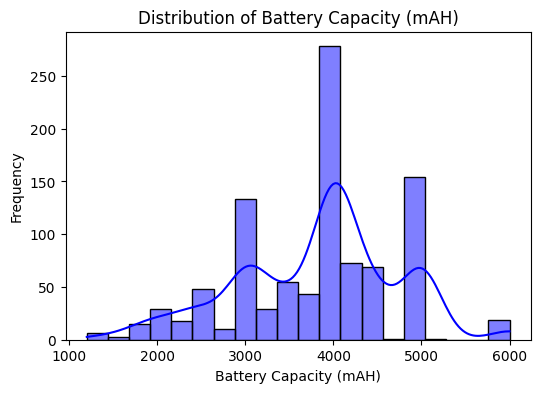

In [ ]:
# Plotting the distribution of battery capacity
plt.figure(figsize=(6,4))
sns.histplot(df['battery capacity in mAH'], kde=True, bins=20, color='blue')
plt.title('Distribution of Battery Capacity (mAH)')
plt.xlabel('Battery Capacity (mAH)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Calculate summary statistics
battery_mean = df['battery capacity in mAH'].mean()
battery_median = df['battery capacity in mAH'].median()
battery_mode = df['battery capacity in mAH'].mode()[0]  # Mode can return multiple values, we will take the first one
battery_std = df['battery capacity in mAH'].std()

# Display summary statistics
print(f"Mean Battery Capacity: {battery_mean:.2f} mAH")
print(f"Median Battery Capacity: {battery_median:.2f} mAH")
print(f"Mode Battery Capacity: {battery_mode:.2f} mAH")
print(f"Standard Deviation: {battery_std:.2f} mAH")


Mean Battery Capacity: 3821.07 mAH
Median Battery Capacity: 4000.00 mAH
Mode Battery Capacity: 4000.00 mAH
Standard Deviation: 908.89 mAH


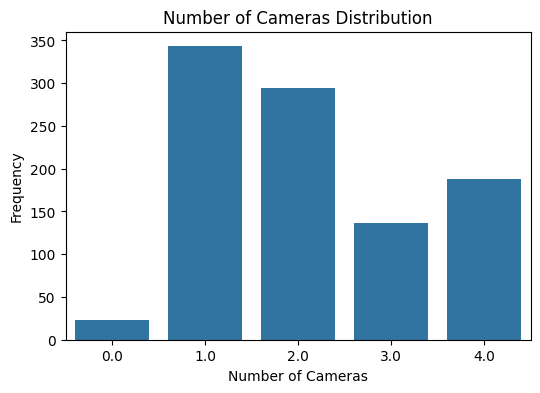

In [ ]:
# Plotting the number of cameras
plt.figure(figsize=(6, 4))
sns.countplot(x='Number of cameras', data=df)
plt.title('Number of Cameras Distribution')
plt.xlabel('Number of Cameras')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# summary statistics for the number of cameras
num_cameras_mode = df['Number of cameras'].mode()[0]
print(f"Mode Number of Cameras: {num_cameras_mode}")



Mode Number of Cameras: 1.0


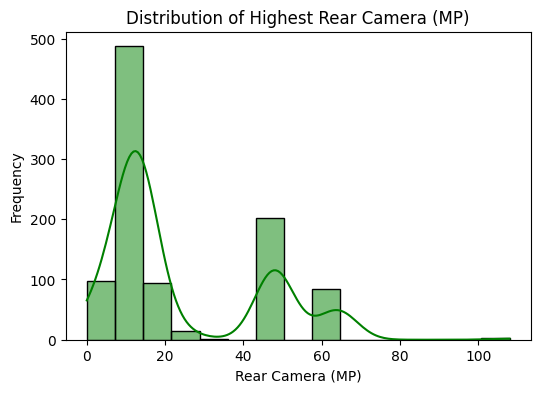

In [ ]:
# Plotting the distribution of the highest rear camera
plt.figure(figsize=(6, 4))
sns.histplot(df['Back camera (Highest)'], kde=True, bins=15, color='green')
plt.title('Distribution of Highest Rear Camera (MP)')
plt.xlabel('Rear Camera (MP)')
plt.ylabel('Frequency')
plt.show()


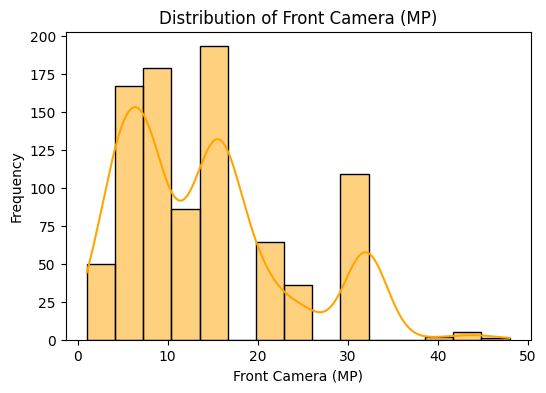

In [ ]:
# Plotting the distribution of the front camera
plt.figure(figsize=(6, 4))
sns.histplot(df['Front camera'], kde=True, bins=15, color='orange')
plt.title('Distribution of Front Camera (MP)')
plt.xlabel('Front Camera (MP)')
plt.ylabel('Frequency')
plt.show()


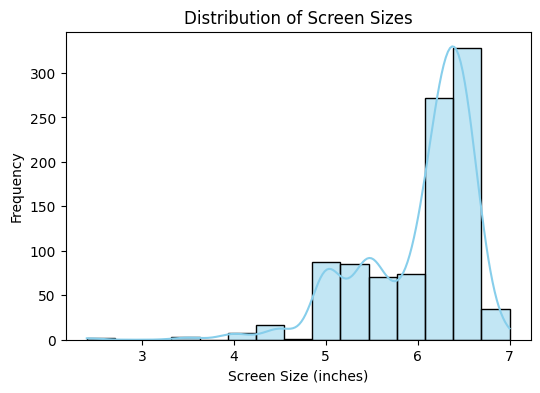

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Screen Size (inches)'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Screen Sizes')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Frequency')
plt.show()


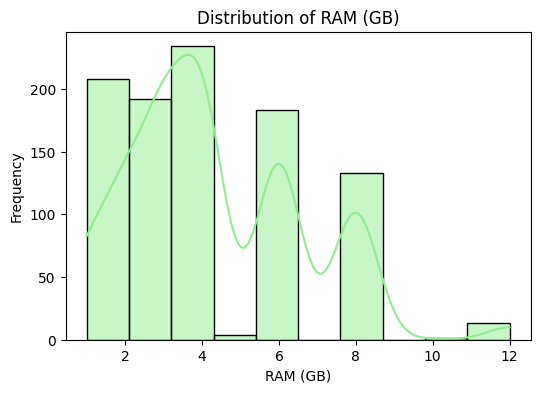

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['mobile RAM GB'], bins=10, kde=True, color='lightgreen')
plt.title('Distribution of RAM (GB)')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.show()


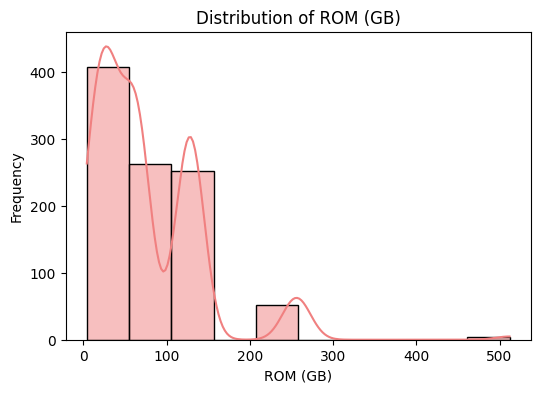

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['mobile ROM GB'], bins=10, kde=True, color='lightcoral')
plt.title('Distribution of ROM (GB)')
plt.xlabel('ROM (GB)')
plt.ylabel('Frequency')
plt.show()


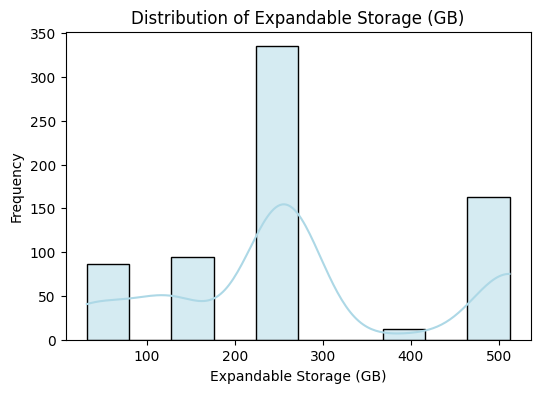

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['expandable storage GB'], bins=10, kde=True, color='lightblue')
plt.title('Distribution of Expandable Storage (GB)')
plt.xlabel('Expandable Storage (GB)')
plt.ylabel('Frequency')
plt.show()


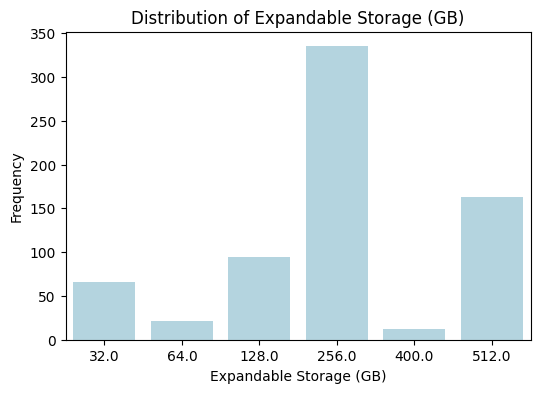

In [ ]:
# Distribution of Expandable Storage

# Count occurrences of each value
storage_counts = df['expandable storage GB'].value_counts().sort_index()

# Plot bar graph
plt.figure(figsize=(6, 4))
sns.barplot(x=storage_counts.index, y=storage_counts.values, color='lightblue')

# Set titles and labels
plt.title('Distribution of Expandable Storage (GB)')
plt.xlabel('Expandable Storage (GB)')
plt.ylabel('Frequency')

# Show plot
plt.show()


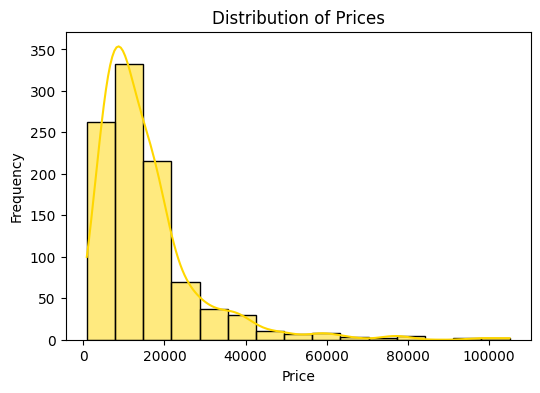

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], bins=15, kde=True, color='gold')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


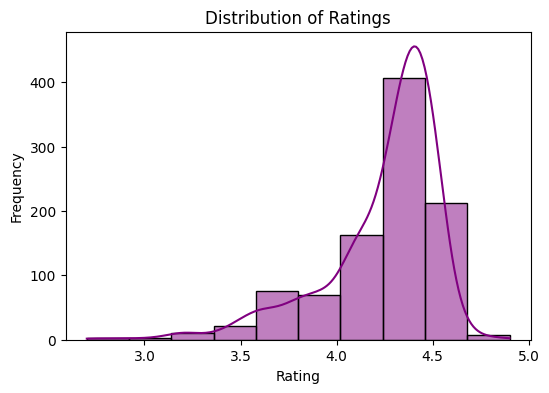

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['rating'], bins=10, kde=True, color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


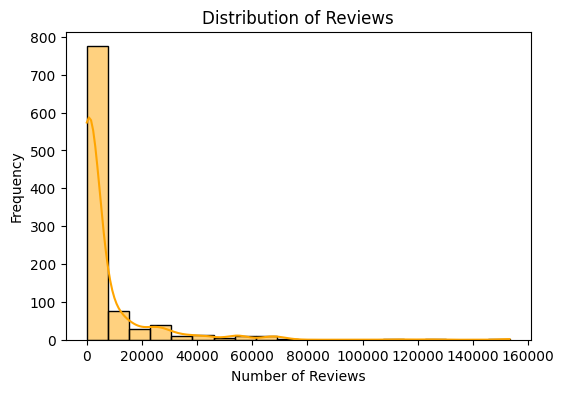

In [ ]:
# Distribution of Reviews

plt.figure(figsize=(6, 4))
sns.histplot(df['reviews'], bins=20, kde=True, color='orange')
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()


## Bivariate Analysis

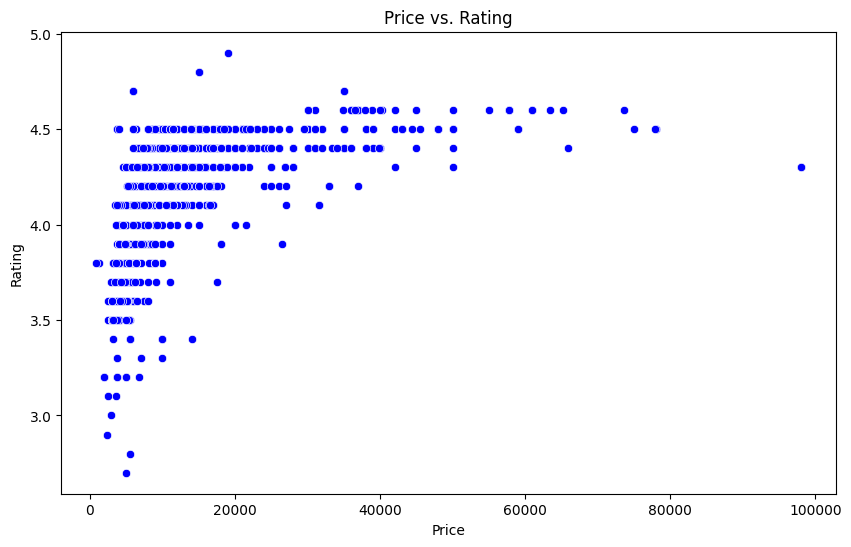

In [ ]:
# Scatter plot for Price vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=df, color='blue')  # Removed line_kws argument
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')

plt.show()

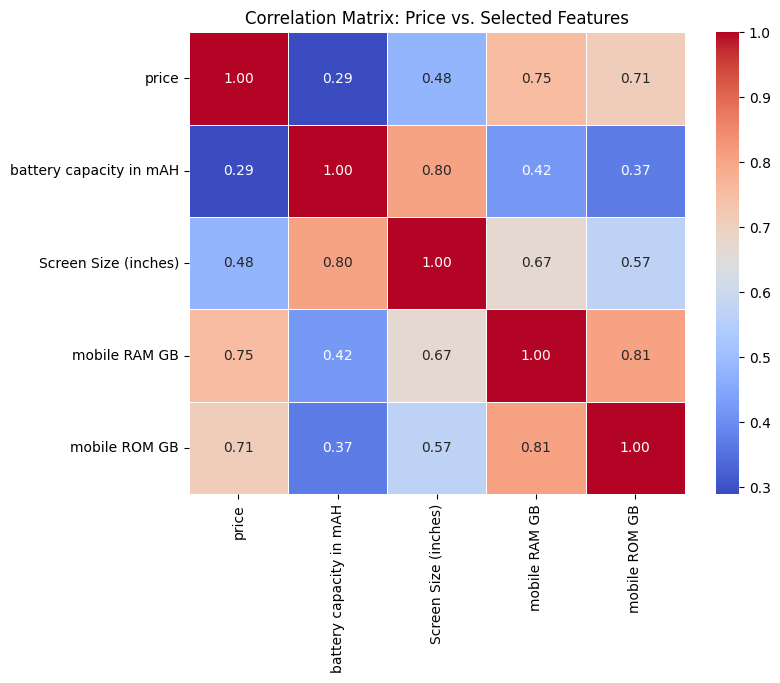

In [ ]:
# Correlation matrix with Price and selected features
features = ['price', 'battery capacity in mAH', 'Screen Size (inches)', 'mobile RAM GB', 'mobile ROM GB']
correlation_matrix = df[features].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Price vs. Selected Features')
plt.show()


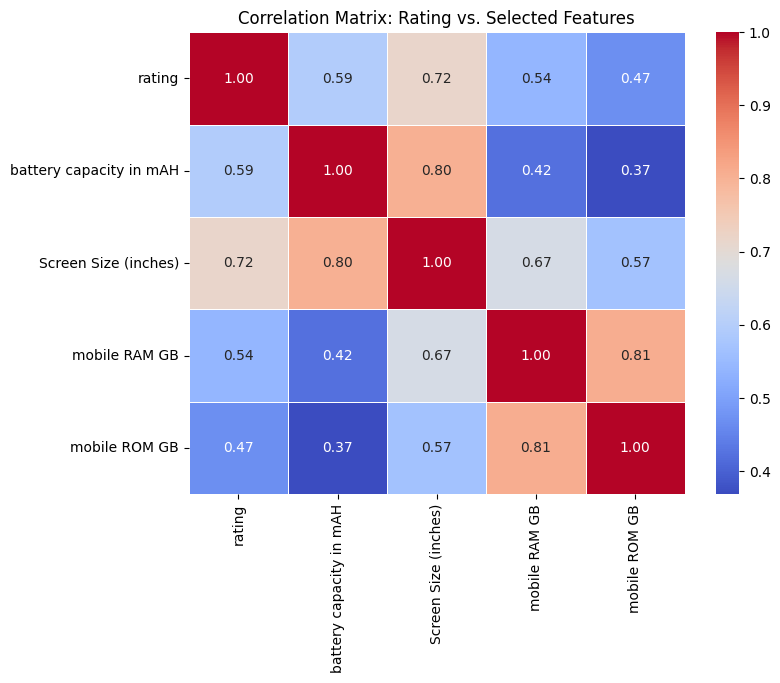

In [ ]:
# Correlation matrix with Rating and selected features
features_rating = ['rating', 'battery capacity in mAH', 'Screen Size (inches)', 'mobile RAM GB', 'mobile ROM GB']
correlation_matrix_rating = df[features_rating].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_rating, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Rating vs. Selected Features')
plt.show()


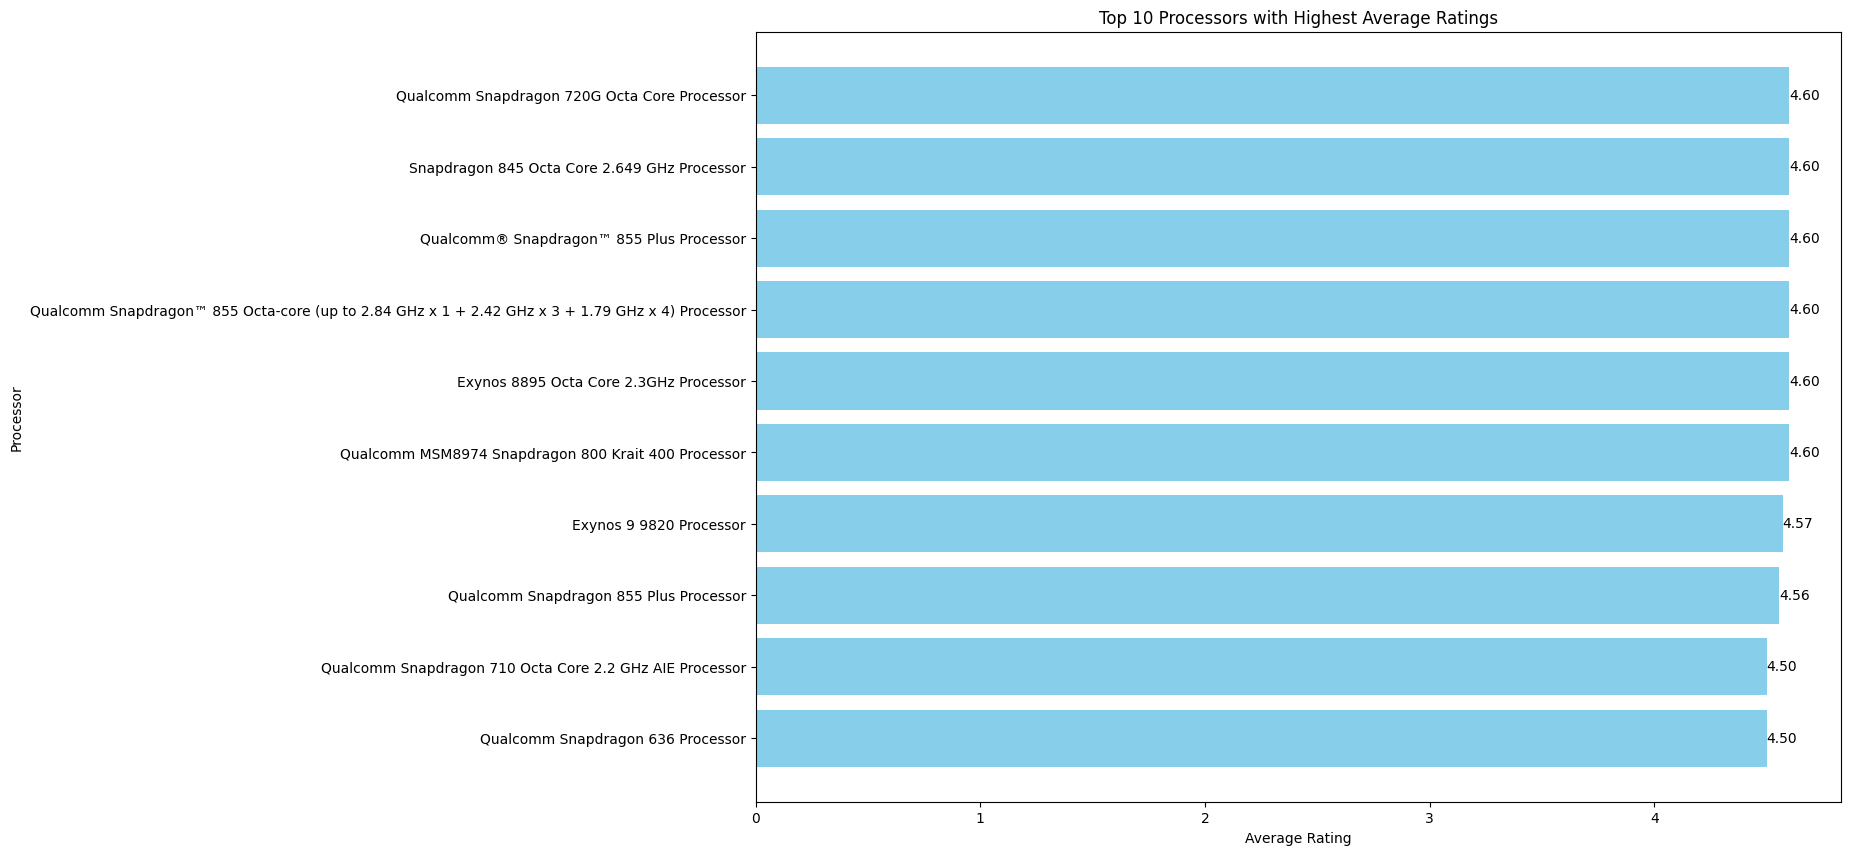

In [ ]:
# Processors with Best Ratings

# Filter out processors containing the word 'warranty'
filtered_df = df[~df['processor'].str.contains('warranty', case=False, na=False)]

# Compute average ratings for remaining processors
avg_ratings = filtered_df.groupby('processor')['rating'].mean().sort_values(ascending=False)

# Select top 10 processors with the highest average ratings
top_10_avg_ratings = avg_ratings.head(10)

# Reverse the order for plotting (highest ratings at the top)
top_10_avg_ratings = top_10_avg_ratings[::-1]

# Plot top 10 processors with highest average ratings
plt.figure(figsize=(14, 10))
bars = plt.barh(top_10_avg_ratings.index, top_10_avg_ratings.values, color='skyblue')

# Add exact average rating values to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10, color='black')

plt.title('Top 10 Processors with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Processor')
plt.show()


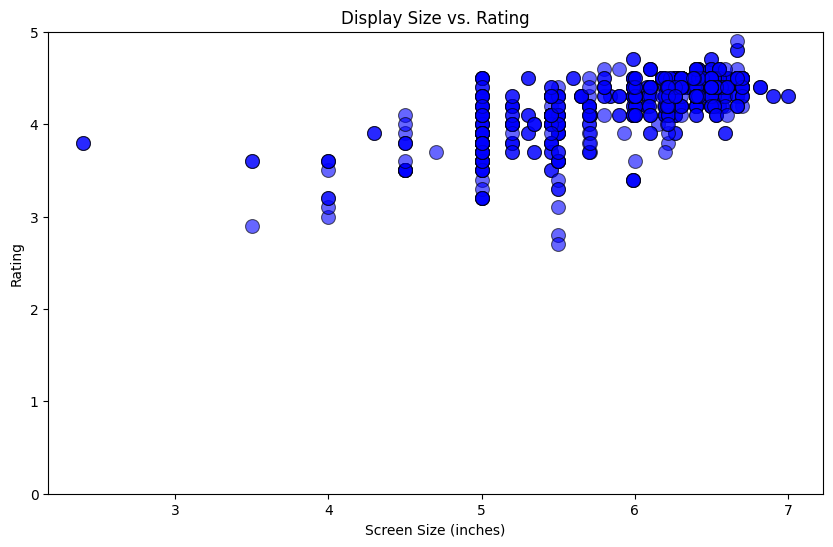

In [ ]:
# Relation between Display Size and Ratings

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen Size (inches)', y='rating', data=df, color='blue', s=100, alpha=0.6, edgecolor='black')
plt.title('Display Size vs. Rating')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Rating')
plt.ylim(0, 5)  # Ensure ratings are within 0 to 5
plt.show()


# Linear Regression Model for Rating Prediction

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

## Data Preprocessing (Missing Values, Standardisation and Train-Test Split)

In [ ]:
# Drop unnecessary columns
df_clean = df.drop(columns=['name', 'processor', 'warranty', 'Display Type']) # These columns have been dropped because Linear regression can not take categorical Values

# Handle missing values with median imputation
imputer = SimpleImputer(strategy='median')
df_clean_imputed = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)

# Separate features and target variable
X = df_clean_imputed.drop(columns=['rating'])
y = df_clean_imputed['rating']

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



## Model Training and Evaluation

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

# Get coefficients
coefficients = model.coef_
feature_names = X.columns

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Display coefficients
print(coefficients_df)

R^2 Score: 0.5118530566684489
                   Feature  Coefficient
0                    price     0.031900
1                  reviews     0.065987
2  battery capacity in mAH     0.005167
3        Number of cameras     0.026252
4    Back camera (Highest)    -0.020673
5             Front camera    -0.004007
6     Screen Size (inches)     0.182656
7            mobile RAM GB     0.012527
8            mobile ROM GB     0.008051
9    expandable storage GB    -0.004747


### Concluding Remarks

- **\( R^2 \) Score:** The model explains 51.2% of the variance in ratings, suggesting moderate predictive capability.

- **Significant Features:**
  - **`Screen Size (inches)`**: Larger screens are associated with higher ratings.
  - **`reviews`**: More reviews correlate with higher ratings.
  - **`price`**: Higher prices are linked to higher ratings.

- **Minimal Impact Features:**
  - Features like `Back camera (Highest)`, `Front camera`, and `expandable storage GB` have less impact on ratings.

- **Improvement Suggestions:**
  - **Tree-Based Methods:** Use decision trees, random forests, or gradient boosting to capture complex relationships and improve predictive accuracy.